In [1]:
import pandas as pd
import numpy as np
import mysql_conn

%matplotlib inline

In [2]:
# paste the boilerplate into a module
conn = mysql_conn.connect()

Please provide your password········


# Sellers

Definition of seller: Has sold an item in a given time frame

**1. How many sellers do we have, between 2017 and end of Sept 2018?**

In [3]:
query = """
SELECT
    DISTINCT oi.seller_id
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01';
    """

unique_sellers = pd.read_sql(query, conn)

In [4]:
unique_sellers.head()

,seller_id
0,3504c0cb71d7fa48d967e0e4c94d59d9
1,289cdb325fb7e7f891c38608bf9e0962
2,4869f7a5dfa277a7dca6462dcf3b52b2
3,66922902710d126a0e7d26b0e3805106
4,2c9e548be18521d1c43cde1c582c6de8


In [5]:
unique_sellers.shape

(2945, 1)

Between 2017 and end of Sept 2018, we had 2945 sellers.

**2. How much do they sell?**

Using descriptive statistics. For example: how many items did they sell on average?

In [6]:
query_2 = """
SELECT
    oi.seller_id,
    COUNT(*) AS items_sold
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01'
GROUP BY oi.seller_id;
    """

items_sold_by_seller = pd.read_sql(query_2, conn)

In [7]:
items_sold_by_seller.describe()

,items_sold
count,2945.000000
mean,37.310017
std,119.996903
min,1.000000
25%,2.000000
50%,8.000000
75%,26.000000
max,1996.000000


In [8]:
items_sold_by_seller.head(20)

,seller_id,items_sold
0,3504c0cb71d7fa48d967e0e4c94d59d9,53
1,289cdb325fb7e7f891c38608bf9e0962,125
2,4869f7a5dfa277a7dca6462dcf3b52b2,1148
3,66922902710d126a0e7d26b0e3805106,155
4,2c9e548be18521d1c43cde1c582c6de8,171
5,8581055ce74af1daba164fdbd55a40de,427
6,16090f2ca825584b5a147ab24aa30c86,406
7,63b9ae557efed31d1f7687917d248a8d,6
8,7c67e1448b00f6e969d365cea6b010ab,1355
9,001cca7ae9ae17fb1caed9dfb1094831,234


In [9]:
items_sold_by_seller["items_sold"].mean()

37.31001697792869

- On average, the sellers have sold 37.3 items

In [15]:
items_sold_by_seller.describe()

,items_sold
count,2945.000000
mean,37.310017
std,119.996903
min,1.000000
25%,2.000000
50%,8.000000
75%,26.000000
max,1996.000000


- Three quarters of our sellers have sold no more than 26 items
- Half of the sellers sold less or equal to 8 items
- The top seller sold 1996 items
- A quarter of the sellers only sold 1 or 2 items

In [18]:
items_sold_by_seller.quantile(.80)

items_sold    36.0
Name: 0.8, dtype: float64

- 80% of the sellers sold no more than the average (37.3)

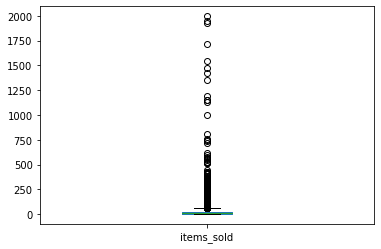

In [19]:
items_sold_by_seller["items_sold"].plot(kind="box");

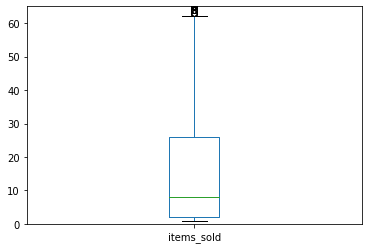

In [21]:
items_sold_by_seller["items_sold"].plot(kind="box", ylim=(0,65));

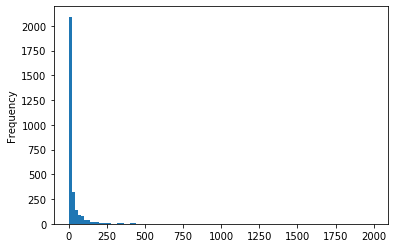

In [26]:
items_sold_by_seller["items_sold"].plot(kind="hist", bins=100);

"Power Law Distribution", "Long-Tail Distribution", "Pareto Distribution"


-> Pretty skewed

In [27]:
items_sold_by_seller["items_sold"].quantile(.9)

83.0

In [39]:
# get deciles
[items_sold_by_seller["items_sold"].quantile(dec / 10) for dec in range(11)]

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 12.0, 19.0, 36.0, 83.0, 1996.0]

In [41]:
[dec / 10 for dec in range(11)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [42]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [44]:
items_sold_by_seller.quantile(np.arange(0,1,0.1))

,items_sold
0.0,1.0
0.1,1.0
0.2,2.0
0.3,3.0
0.4,5.0
0.5,8.0
0.6,12.0
0.7,19.0
0.8,36.0
0.9,83.0


**3. How much revenue do they generate?**

In [45]:
query_3 = """
SELECT
    oi.seller_id,
    SUM(oi.price) AS revenue
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01'
GROUP BY oi.seller_id;
    """

rev_by_seller = pd.read_sql(query_3, conn)

In [46]:
rev_by_seller.describe()

,revenue
count,2945.000000
mean,4475.662870
std,13951.130975
min,6.500000
25%,226.000000
50%,849.699982
75%,3514.000000
max,226987.928337


- On average, sellers generated almost 4500 Rios
- Half of the sellers generated less than 850 Rios
- Only one in four sellers generated at least 3500 Rios
- The top 25% of the sellers, generated at least 3500 Rios
- The top sellers generated ~227k Rios

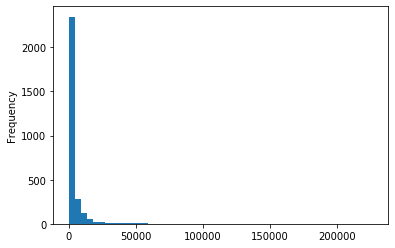

In [50]:
rev_by_seller["revenue"].plot(kind="hist", bins=50);

**How much do we depend on our top sellers?**